In [92]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [44]:
%matplotlib inline

In [21]:
path = "running/transformer_hier++/"

In [73]:
df = pd.read_csv(os.path.join(path, "error_greedy_test.tsv"), delimiter="\t")

In [74]:
df.head()

,file,context,gold,generated,loss,bleu,f1_entity
0,MUL1493,"SOS hello , i am trying to find a train that l...",SOS the closest arrival time i can give you is...,"SOS yes , i have [value_count] trains that wil...",9.049051,0.375771,0.000000
1,PMUL2380,"SOS hi , could you help me with some informati...",SOS absolutely ! what attraction were you thin...,SOS what about [attraction_name] ? EOS,6.287688,0.009921,0.000000
2,PMUL0205,SOS i need a place to stay in the [hotel_area]...,SOS of course ! we have multiple place -s to c...,SOS there are [value_count] guesthouses that m...,9.763255,0.007767,99.850125
3,PMUL1788,SOS please help me find a hotel called flinche...,SOS it s phone number is [hotel_phone] and is ...,"SOS yes , it s a hotel and the phone number is...",6.795474,20.149429,66.577830
4,PMUL1435,SOS i need to take a train from [train_departu...,SOS i have [value_count] that leave after [tra...,SOS there are [value_count] trains that leave ...,6.805921,23.080884,99.850125


In [75]:
df.describe()

,loss,bleu,f1_entity
count,7372.000000,7372.000000,7372.000000
mean,7.565840,20.449129,51.451595
std,2.382533,22.715048,46.284015
min,0.037561,0.000047,0.000000
25%,6.716732,0.019109,0.000000
50%,8.107281,16.505976,66.577830
75%,9.134729,33.649334,99.850125
max,13.191915,96.821333,99.935741


In [76]:
df['context_length'] = df.apply(lambda r: len(r['context'].split('<br>')), 1)

In [77]:
df.sample(10)

,file,context,gold,generated,loss,bleu,f1_entity,context_length
4536,MUL0473,SOS i need a train departing [train_departure]...,SOS sure thing . there are several parks in to...,SOS there are [value_count] museums in the [at...,8.904293,0.014049,0.000000,9
1770,PMUL3931,SOS i need to dine at some place [restaurant_p...,SOS there are [value_count] in the area . i re...,SOS there are [value_count] restaurant -s that...,6.852800,32.696265,99.900050,3
828,MUL2316,SOS i want to visit some architecture . EOS,SOS if you come to the [attraction_area] of to...,SOS there are [value_count] museums in the [at...,7.332885,0.005047,79.920040,1
6461,PMUL3282,SOS i am planning a trip in [value_place] . EO...,SOS you are very welcome ! bye now ! EOS,SOS thank you for using our service . have a g...,8.877898,0.000376,0.000000,15
6493,MUL1678,SOS i'll be flying into [train_destination] an...,SOS your reservation is set . the reference nu...,SOS booking was successful . reference number ...,9.515862,28.057633,99.850125,15
5727,PMUL3423,SOS i am looking for information . can you hel...,"SOS okay , where are you departing from ? EOS",SOS where would you like to be picked up from ...,8.099203,0.514240,0.000000,13
6326,PMUL1118,SOS i am in [value_place] for the week and wan...,SOS did you need any help with anything else o...,SOS you are welcome . is there anything else i...,8.982385,0.015123,0.000000,15
6772,PMUL2882,"SOS hi , can you give me some information on a...",SOS what day and time would you like to book a...,SOS what time would you like to leave ? EOS,7.896421,31.262938,0.000000,17
7333,MUL0072,SOS i am looking for a place to stay . i would...,SOS you are welcome . enjoy your stay . EOS,SOS you are welcome . have a great day . EOS,4.255162,36.462869,0.000000,23
6359,MUL0947,SOS i am looking for a museum to go to in [val...,SOS we can definitely help with that . do you ...,SOS i can help you with that . what time would...,7.044596,0.349023,0.000000,15


In [78]:
df.iloc[2099]['generated']

'SOS what time would you like to leave ? EOS'

In [79]:
df.iloc[2099]['gold']

'SOS where you will be traveling from and when would you like to leave ? EOS'

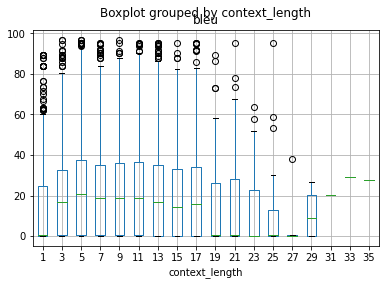

In [80]:
df.boxplot(column='bleu', by='context_length')

In [83]:
# df['bleu_bin'] = df.apply(lambda r: r['bleu']//10, 1)

In [85]:
df.nlargest(10, ['loss'])

,file,context,gold,generated,loss,bleu,f1_entity,context_length,bleu_bin
7158,PMUL3858,SOS i am looking for info on [restaurant_price...,SOS helping ha been m pleasure EOS,SOS thank you for using our service . have a g...,13.191915,0.000340,0.000000,19,0.0
2295,MUL1212,SOS i am looking for a place to dine in the [r...,SOS take care and enjoy ! EOS,SOS is there anything else i can help you with...,13.016194,0.000352,0.000000,5,0.0
7237,PMUL1867,"SOS yes , can you help me with my hotel plans ...",SOS you are welcome . have a great day ! EOS,SOS is there anything else i can help you with...,12.762652,0.000383,0.000000,21,0.0
2715,PMUL4044,SOS i am looking for a particular hotel . its ...,SOS you are welcome and have a great day ! EOS,SOS is there anything else i can help you with...,12.704008,0.000383,0.000000,5,0.0
5620,PMUL3424,"SOS hi , you can help me find a [restaurant_pr...",SOS thanks you for visiting us in [value_place...,SOS you are welcome . is there anything else i...,12.599606,0.000364,0.000000,13,0.0
5515,PMUL0457,SOS i need more on a hotel called [hotel_name]...,SOS great ! your reference number is [restaura...,SOS booking was successful . the table will be...,12.564560,21.717899,66.577830,11,2.0
4533,SNG02006,SOS i need a taxi departing from [restaurant_n...,SOS great ! have a nice day ! EOS,SOS is there anything else i can help you with...,12.150045,0.000352,0.000000,9,0.0
6377,SNG01551,SOS i am curious about the [value_count] star ...,"SOS very good , sir . that worked and i have a...",SOS booking was successful . reference number ...,12.138628,0.352430,99.850125,15,0.0
2046,SNG01936,SOS i am looking for [hotel_name] EOS<br>SOS i...,SOS you are very welcome ! EOS,SOS is there anything else i can help you with...,11.873879,0.000390,0.000000,5,0.0
5649,MUL1898,SOS i am looking for information abut [attract...,SOS booked ! reference number [train_reference...,"SOS booking was successful , the total fee is ...",11.849265,0.476978,99.900050,13,0.0


In [103]:
df['entities'] = df.apply(lambda r: re.findall(r'\[([^ ]+)\]', r['gold']), 1)
df['num_entities'] = df.apply(lambda r: len(r['entities']), 1)

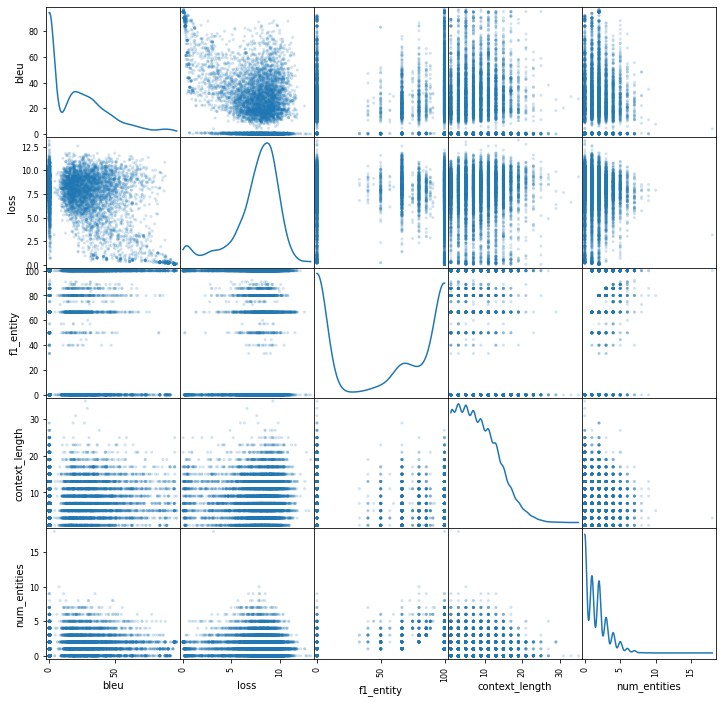

In [98]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df[['bleu', 'loss', 'f1_entity', 'context_length', 'num_entities']], alpha=0.2, diagonal='kde', figsize=(12,12))

In [115]:
entity_log = {
    'entity':[],
    'loss':[],
    'bleu':[],
    'f1_entity':[],
    'context_length':[]
}
for _, row in df.iterrows():
    for e in row['entities']:
        entity_log['entity'].append(e)
        entity_log['loss'].append(row['loss'])
        entity_log['bleu'].append(row['bleu'])
        entity_log['f1_entity'].append(row['f1_entity'])
        entity_log['context_length'].append(row['context_length'])

In [117]:
df_entity_log = pd.DataFrame.from_dict(entity_log)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41]),
 <a list of 41 Text major ticklabel objects>)

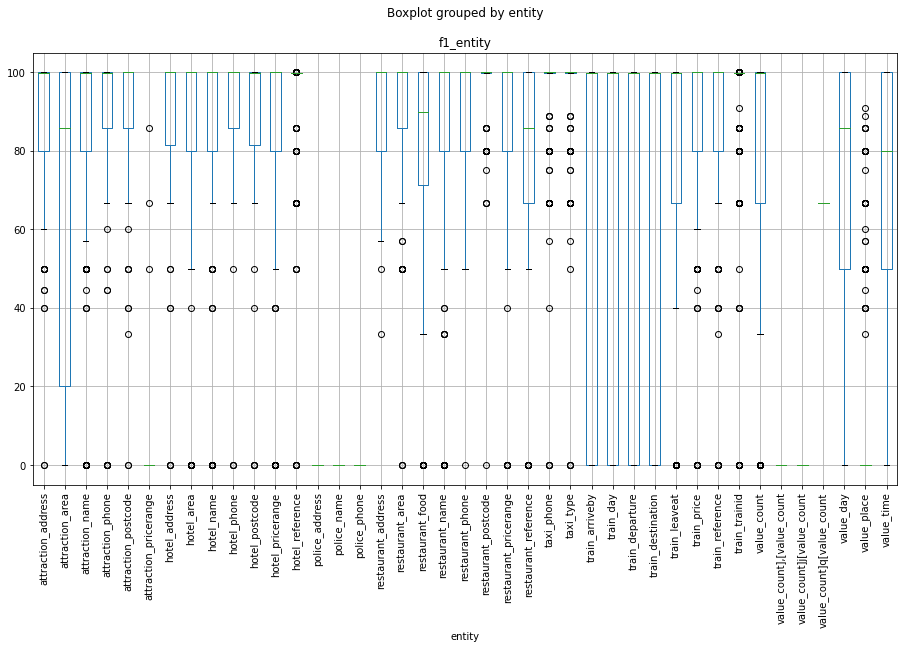

In [126]:
df_entity_log.boxplot(column='f1_entity', by='entity', figsize=(15,8))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41]),
 <a list of 41 Text major ticklabel objects>)

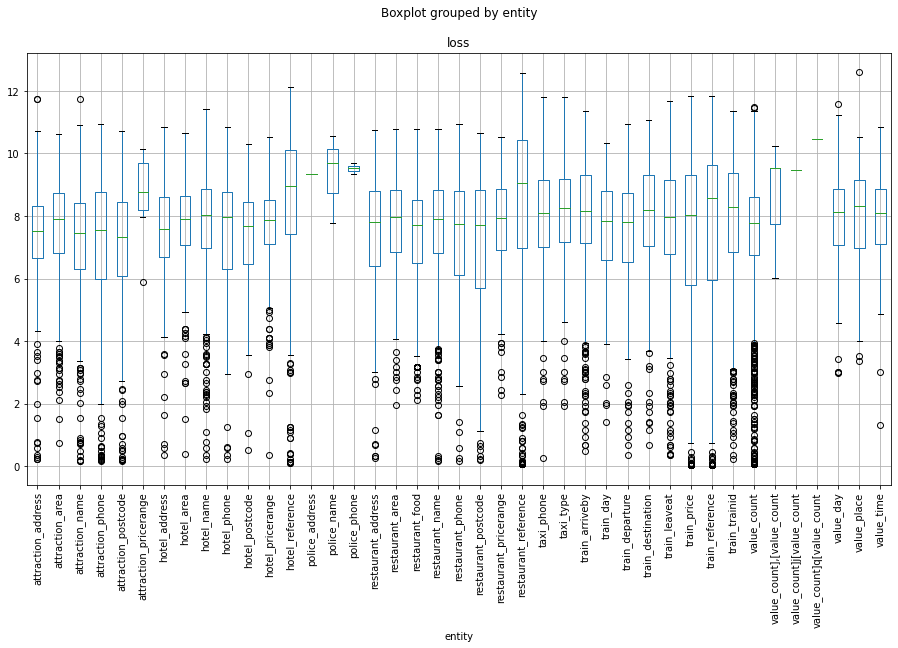

In [128]:
df_entity_log.boxplot(column='loss', by='entity', figsize=(15,8))
plt.xticks(rotation=90)